# Comparar y probar modelos de lana - Dataset 1

Al llegar acá contamos con 4 modelos para comparar, sin embargo se elimino como candidato al modelo entrenado con los datos escalados, dado que no aportaba nada en comparación con su igual sin escalar. Por lo tanto la comparación se va a realizar sobre los 3 modelos restantes.

Recordemos que:
- El modelo 1 se entreno con el primer dataset a nivel departamental de Chubut, que es el vamos a estar probando en este Jupyter.
- El modelo 2 se entreno con el dataset a nivel departamental de Chubut mas los datos del Mirabueno, tener en cuenta que contiene al dataset anterior.
- El modelo 3 se entreno con el dataset actualizado a nivel departamental de Chubut.

Para hacer la comparación se van a tomar las siguientes reglas:
- Si el score es menor a 0, es decir valores negativos, se le va a restar 1.
- Si el score es menor a 0.60, se le va a restar 0.5.
- Si el score es mayor a 0.60, se le va a sumar 1.
- Se le va a sumar un punto a aquel modelo que funcione mejor.
- Se le va a restar 0.25 a aquel modelo que puede conocer los datos debido a que fue entrenado por ese dataset, recordemos que en este punto cada modelo solo conoce el 80% de su dataset de entrenamiento.

Dado que el modelo 2 se entreno con un dataset parecido al de este Jupyter, se lo va a penalizar con 0.2.

En la siguiente celda de código, se importarán varias librerías, entre ellas:

- Pandas para manejar los datos a través de DataFrames.
- Matplotlib y Seaborn se utilizarán para visualizar los resultados de las predicciones mediante gráficos.
- De Scikit-learn se utilizarán la  métricas **r2_score**.
- Por último, se usará load_pickle para recuperar el modelo entrenado guardado previamente.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from statsmodels.iolib.smpickle import load_pickle

Primero cargaremos los tres modelos para luego probarlos con datos. 

In [2]:
modelo_lana_1 = load_pickle('modelos/modelo_prediccion_lana_1')
modelo_lana_2 = load_pickle('modelos/modelo_prediccion_lana_2')
modelo_lana_3 = load_pickle('modelos/modelo_prediccion_lana_3')

## Pruebas con dos tuplas

La idea acá es simular que un productor cuenta con dos años de datos respecto a la lluvia y al total de ovinos. Entonces le pasamos ambos datos al modelo, y con ellos hace la predicción, dándonos los kilos de lana, dato que también conocemos y nos sirve para comparar el valor real con el valor predicho. 

### Prueba 1

Se tomaron dos observaciones del año 2013 y 2014 correspondientes a Biedma. 

| total_ovinos | cant_lluvia | kilos_lana |
| --- | --- | --- |
| 187897 | 226.5 | 620176.0 |
| 181925 | 331.3 | 649130.0 |

Vamos a realizar una predicción para cada modelo y ver cual es su score con estos datos.

In [3]:
resultado_prediccion_1 = modelo_lana_1.predict([[226.5,187897], [331.3,181925]])

In [4]:
resultado_prediccion_2 = modelo_lana_2.predict([[226.5,187897], [331.3,181925]])

In [5]:
resultado_prediccion_3 = modelo_lana_3.predict([[226.5,187897], [331.3,181925]])

In [6]:
dato_real =[[620176.0],[649130.0]]

In [7]:
'Score o R2 de la predicción 1: {:.2f}'.format(r2_score(dato_real, resultado_prediccion_1))

'Score o R2 de la predicción 1: -7.01'

In [8]:
'Score o R2 de la predicción 2: {:.2f}'.format(r2_score(dato_real, resultado_prediccion_2))

'Score o R2 de la predicción 2: -12.08'

In [9]:
'Score o R2 de la predicción 3: {:.2f}'.format(r2_score(dato_real, resultado_prediccion_3))

'Score o R2 de la predicción 3: -3.53'

Se observa que ningún modelo lográ predecir correctamente estos datos según el R2.

Vamos a graficar estos resultados para ver que tan alejadas están las líneas visualmente.

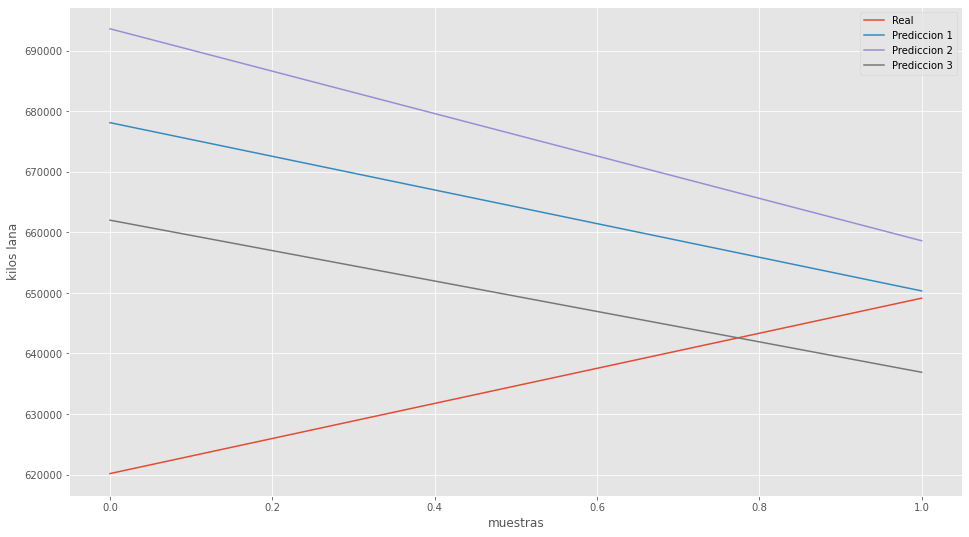

In [10]:
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
plt.plot(range(len(dato_real)),dato_real,label="Real")
plt.plot(range(len(resultado_prediccion_1)),resultado_prediccion_1,label="Prediccion 1")
plt.plot(range(len(resultado_prediccion_2)),resultado_prediccion_2,label="Prediccion 2")
plt.plot(range(len(resultado_prediccion_3)),resultado_prediccion_3,label="Prediccion 3")
plt.xlabel('muestras')
plt.ylabel('kilos lana')
plt.legend()
plt.show()

Los gráficos nos muestran lo que nos indicaban las métricas, los modelos no logran predecir estos datos dado que las tres lineas de predicción no se ajustan a la real. Se observa que en la predicción uno, el primer valor lo predice muy mal pero el segundo casi perfecto, la predicción dos tiene un comportamiento similar pero para el segundo esta un poco más alejado y la predicción tres no da un valor tan alto como primer valor y el segundo que da es un poco bajo. 

Entonces el "mejor modelo" resulta ser el 3, seguido por el 1 y el que peor predice es el 2. 

| Modelo | Puntaje positvo | Puntaje negativo | Total |
| --- | --- | --- | --- |
| 1 | 0 | -1.25 | -1.25 |
| 2 | 0 | -1.20 | -1.20 |
| 3 | 1 | -1 | 0.0 |

### Prueba 2

Se tomaron dos obsevaciones correspondientes a Biedma del 2014 y a Florentino Ameghino del 2013.

| total_ovinos | cant_lluvia | kilos_lana |
| --- | --- | --- |
| 181925 | 331.3 | 649130.0 |
| 284639 | 135.5 | 1143408.0 |

Vamos a realizar una predicción para cada modelo y ver cual es su score con estos datos.

In [11]:
resultado_prediccion_1 = modelo_lana_1.predict([[331.3,181925], [135.5,284639]])

In [12]:
resultado_prediccion_2 = modelo_lana_2.predict([[331.3,181925], [135.5,284639]])

In [13]:
resultado_prediccion_3 = modelo_lana_3.predict([[331.3,181925], [135.5,284639]])

In [14]:
dato_real =[[649130.0],[1143408.0]]

In [15]:
'Score o R2 de la predicción 1: {:.2f}'.format(r2_score(dato_real, resultado_prediccion_1))

'Score o R2 de la predicción 1: 0.93'

In [16]:
'Score o R2 de la predicción 2: {:.2f}'.format(r2_score(dato_real, resultado_prediccion_2))

'Score o R2 de la predicción 2: 0.94'

In [17]:
'Score o R2 de la predicción 3: {:.2f}'.format(r2_score(dato_real, resultado_prediccion_3))

'Score o R2 de la predicción 3: 0.86'

Se observa que todos los modelos logran predecir correctamente estos datos según el R2.

Vamos a graficar estos resultados para ver que tan alejadas están las líneas visualmente.

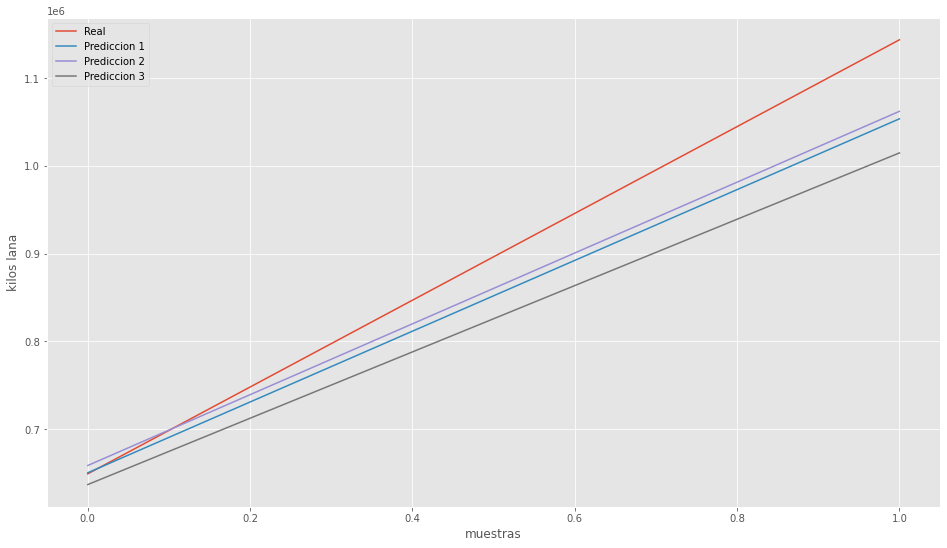

In [18]:
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
plt.plot(range(len(dato_real)),dato_real,label="Real")
plt.plot(range(len(resultado_prediccion_1)),resultado_prediccion_1,label="Prediccion 1")
plt.plot(range(len(resultado_prediccion_2)),resultado_prediccion_2,label="Prediccion 2")
plt.plot(range(len(resultado_prediccion_3)),resultado_prediccion_3,label="Prediccion 3")
plt.xlabel('muestras')
plt.ylabel('kilos lana')
plt.legend()
plt.show()

Los gráficos nos muestran lo que nos indicaban las métricas, los modelos logran predecir estos datos.

Entonces el mejor modelo resulta ser el 2, seguido por el 1 y el que peor predice es el 3. 

| Modelo | Puntaje positvo | Puntaje negativo | Total |
| --- | --- | --- | --- |
| 1 | 1 | -0.25 | -0.5 |
| 2 | 2 | -0.20 | 0.6 |
| 3 | 1 | 0 | 1.0 |

### Prueba 3

Se tomaron dos obsevaciones correspondientes a Biedma del 2012 y a Florentino Ameghino de 2009.

| total_ovinos | cant_lluvia | kilos_lana |
| --- | --- | --- |
| 193849 | 46.40 | 649130.0 |
| 343991 | 137.7 | 1474032.0 |

Vamos a realizar una predicción para cada modelo y ver cual es su score con estos datos.

In [19]:
resultado_prediccion_1 = modelo_lana_1.predict([[46.40,193849], [137.7,343991]])

In [20]:
resultado_prediccion_2 = modelo_lana_2.predict([[46.40,193849], [137.7,343991]])

In [21]:
resultado_prediccion_3 = modelo_lana_3.predict([[46.40,193849], [137.7,343991]])

In [22]:
dato_real =[[649130.0],[1474032.0]]

In [23]:
'Score o R2 de la predicción 1: {:.2f}'.format(r2_score(dato_real, resultado_prediccion_1))

'Score o R2 de la predicción 1: 0.88'

In [24]:
'Score o R2 de la predicción 2: {:.2f}'.format(r2_score(dato_real, resultado_prediccion_2))

'Score o R2 de la predicción 2: 0.87'

In [25]:
'Score o R2 de la predicción 3: {:.2f}'.format(r2_score(dato_real, resultado_prediccion_3))

'Score o R2 de la predicción 3: 0.82'

Se observa que todos los modelos logran predecir correctamente estos datos según el R2.

Vamos a graficar estos resultados para ver que tan alejadas están las líneas visualmente.

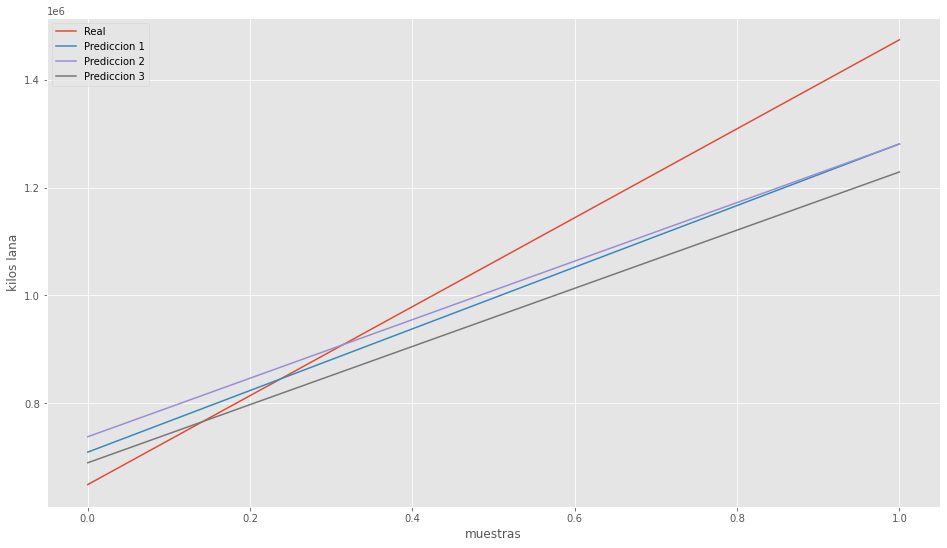

In [26]:
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
plt.plot(range(len(dato_real)),dato_real,label="Real")
plt.plot(range(len(resultado_prediccion_1)),resultado_prediccion_1,label="Prediccion 1")
plt.plot(range(len(resultado_prediccion_2)),resultado_prediccion_2,label="Prediccion 2")
plt.plot(range(len(resultado_prediccion_3)),resultado_prediccion_3,label="Prediccion 3")
plt.xlabel('muestras')
plt.ylabel('kilos lana')
plt.legend()
plt.show()

Los gráficos nos muestran lo que nos indicaban las métricas, los modelo logran predecir estos datos.

El mejor modelo resulta ser el 1, pero como fue entrenado con estos datos se lo va a penalizar, seguido por el 2 y por último el 3 . 

| Modelo | Puntaje positvo | Puntaje negativo | Total |
| --- | --- | --- | --- |
| 1 | 2 | -0.25 | 1.25 |
| 2 | 1 | -0.20 | 1.40 |
| 3 | 1 | 0 | 2.00 |

### Prueba 4

Se tomaron dos obsevaciones correspondientes a Rawson del 2014 y a Río Senguer de 2013.

| total_ovinos | cant_lluvia | kilos_lana |
| --- | --- | --- |
| 120837 | 187.2 | 211280.0 |
| 834289 | 105.77 | 2273536.0 |

Vamos a realizar una predicción para cada modelo y ver cual es su score con estos datos.

In [27]:
resultado_prediccion_1 = modelo_lana_1.predict([[187.2,120837], [105.77,834289]])

In [28]:
resultado_prediccion_2 = modelo_lana_2.predict([[187.2,120837], [105.77,834289]])

In [29]:
resultado_prediccion_3 = modelo_lana_3.predict([[187.2,120837], [105.77,834289]])

In [30]:
dato_real =[[211280.0],[2273536.0]]

In [31]:
'Score o R2 de la predicción 1: {:.2f}'.format(r2_score(dato_real, resultado_prediccion_1))

'Score o R2 de la predicción 1: 0.61'

In [32]:
'Score o R2 de la predicción 2: {:.2f}'.format(r2_score(dato_real, resultado_prediccion_2))

'Score o R2 de la predicción 2: 0.66'

In [33]:
'Score o R2 de la predicción 3: {:.2f}'.format(r2_score(dato_real, resultado_prediccion_3))

'Score o R2 de la predicción 3: 0.73'

Se observa que todos los modelos logran predecir correctamente estos datos según el R2, pero a todos les costo un poco.

Vamos a graficar estos resultados para ver que tan alejadas están las líneas visualmente.

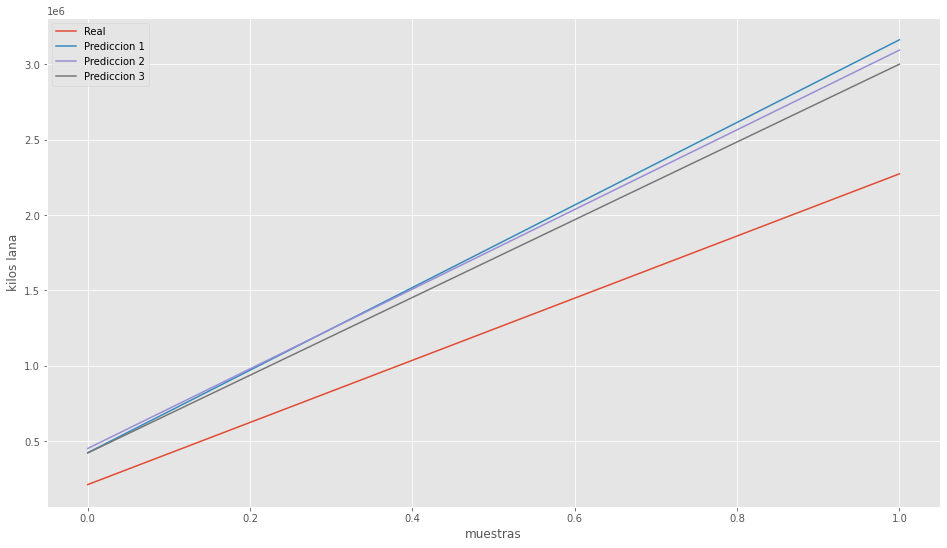

In [34]:
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
plt.plot(range(len(dato_real)),dato_real,label="Real")
plt.plot(range(len(resultado_prediccion_1)),resultado_prediccion_1,label="Prediccion 1")
plt.plot(range(len(resultado_prediccion_2)),resultado_prediccion_2,label="Prediccion 2")
plt.plot(range(len(resultado_prediccion_3)),resultado_prediccion_3,label="Prediccion 3")
plt.xlabel('muestras')
plt.ylabel('kilos lana')
plt.legend()
plt.show()

Los gráficos nos muestran lo que nos indicaban las métricas, los modelo logran predecir estos datos pero están un poco alejados.

El mejor modelo resulta ser el 3, seguido por el 2 y el 1. 

| Modelo | Puntaje positvo | Puntaje negativo | Total |
| --- | --- | --- | --- |
| 1 | 1 | -0.25 | 2.0 |
| 2 | 1 | -0.20 | 2.2 |
| 3 | 2 | 0 | 4.0 |

### Prueba 5

Se tomaron dos obsevaciones correspondientes a Gaiman del 2014 y a Futalefú de 2014.

| total_ovinos | cant_lluvia | kilos_lana |
| --- | --- | --- |
| 245238 | 137.93 | 804810.0 |
| 164541 | 614.79 | 455920.0 |

In [35]:
resultado_prediccion_1 = modelo_lana_1.predict([[137.93,245238], [614.79,164541]])

In [36]:
resultado_prediccion_2 = modelo_lana_2.predict([[137.93,245238], [614.79,164541]])

In [37]:
resultado_prediccion_3 = modelo_lana_3.predict([[137.93,245238], [614.79,164541]])

In [38]:
dato_real =[[804810.0],[455920.0]]

Vamos a realizar una predicción para cada modelo y ver cual es su score con estos datos.

In [39]:
'Score o R2 de la predicción 1: {:.2f}'.format(r2_score(dato_real, resultado_prediccion_1))

'Score o R2 de la predicción 1: 0.63'

In [40]:
'Score o R2 de la predicción 2: {:.2f}'.format(r2_score(dato_real, resultado_prediccion_2))

'Score o R2 de la predicción 2: 0.62'

In [41]:
'Score o R2 de la predicción: {:.2f}'.format(r2_score(dato_real, resultado_prediccion_3))

'Score o R2 de la predicción: 0.73'

Se observa que todos los modelos logran predecir correctamente estos datos según el R2.

Vamos a graficar estos resultados para ver que tan alejadas están las líneas visualmente.

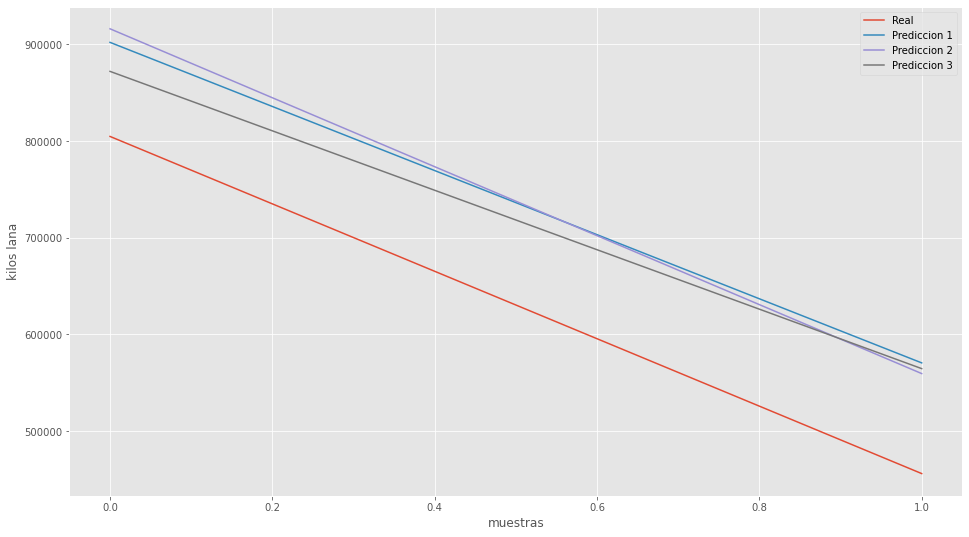

In [42]:
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
plt.plot(range(len(dato_real)),dato_real,label="Real")
plt.plot(range(len(resultado_prediccion_1)),resultado_prediccion_1,label="Prediccion 1")
plt.plot(range(len(resultado_prediccion_2)),resultado_prediccion_2,label="Prediccion 2")
plt.plot(range(len(resultado_prediccion_3)),resultado_prediccion_3,label="Prediccion 3")
plt.xlabel('muestras')
plt.ylabel('kilos lana')
plt.legend()
plt.show()

Los gráficos nos muestran lo que nos indicaban las métricas, los modelo logran predecir estos datos, pero estan un poco lejos. El mejor modelo resulta ser el 3, seguido por el 1 y por último el 2. 

| Modelo | Puntaje positvo | Puntaje negativo | Total |
| --- | --- | --- | --- |
| 1 | 1 | -0.25 | 2.75 |
| 2 | 1 | -0.20 | 3.0 |
| 3 | 2 | 0 | 6.0 |

## Pruebas con una tupla

La idea acá es simular que un productor cuenta con los datos de la lluvia y el total de ovinos, del año actual respectivo. Entonces le pasamos ambos datos al modelo, y con ellos hace la predicción para ese año, dándonos los kilos de lana, dato que también conocemos y nos sirve para comparar el valor real con el valor predicho.

### Prueba 1

Se tomo una observación del dataset correspondiente a Cushamen del 2014.

| total_ovinos | cant_lluvia | kilos_lana |
| --- | --- | --- |
| 230802 | 640.4 | 729750.0 |

In [43]:
dato_real = 729750.0

In [44]:
resultado_prediccion_1 = modelo_lana_1.predict([[640.4,230802]])
round(resultado_prediccion_1[0][0] - dato_real,2)

93698.36

In [45]:
resultado_prediccion_2 = modelo_lana_2.predict([[640.4,230802]])
round(resultado_prediccion_2[0][0] - dato_real,2)

71097.97

In [46]:
resultado_prediccion_3 = modelo_lana_3.predict([[640.4,230802]])
round(resultado_prediccion_3[0][0] - dato_real,2)

73307.61

En estos tres resultados, vemos que los modelos predijeron kilogramos de lana demás, es decir el modelo 1 se paso por 93698.36 kgs, el modelo 2 se paso por 71097.97 kgs y el modelo 3 se paso por 73307.61 kgs.

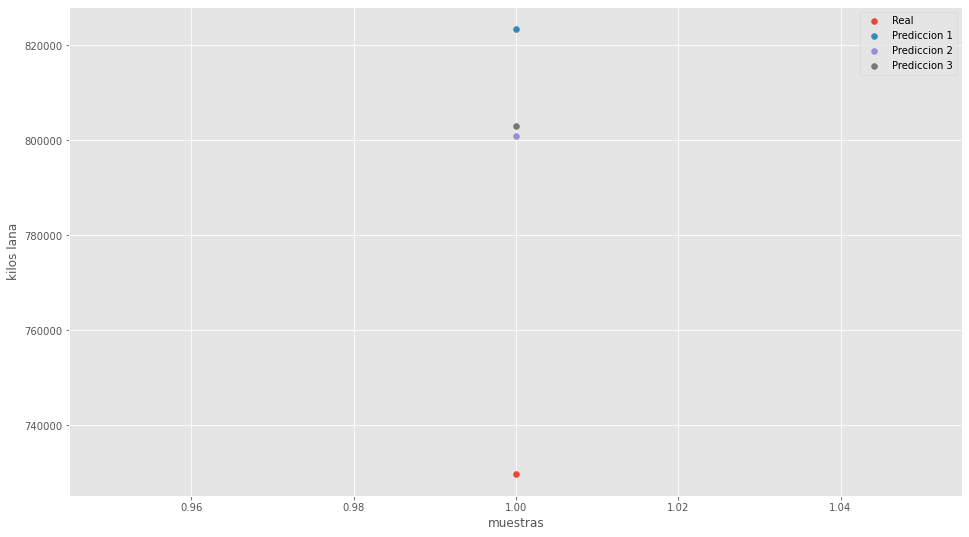

In [47]:
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
plt.scatter(y=dato_real, x=1, label="Real")
plt.scatter(y=resultado_prediccion_1,x=1, label="Prediccion 1")
plt.scatter(y=resultado_prediccion_2,x=1, label="Prediccion 2")
plt.scatter(y=resultado_prediccion_3,x=1, label="Prediccion 3")
plt.xlabel('muestras')
plt.ylabel('kilos lana')
plt.legend()
plt.show()

El mejor modelo resulta ser el 2, seguido por el 3 y por último el 1. Cómo acá no se puede calcular el R2, por estar trabajando con un solo dato, solo se va a tener en cuenta cuál es el modelo que esta mas cerca del dato real.

| Modelo | Puntaje positvo | Puntaje negativo | Total |
| --- | --- | --- | --- |
| 1 | 0 | -0.25 | 2.5 |
| 2 | 0 | -0.20 | 2.8 |
| 3 | 1 | 0 | 7.0 |

### Prueba 2

Se tomo una observación del dataset correspondiente a Sarmiento del 2015.

| total_ovinos | cant_lluvia | kilos_lana |
| --- | --- | --- |
| 215378 | 130.55 | 908640.0 |

In [48]:
dato_real = 908640.0

In [49]:
resultado_prediccion_1 = modelo_lana_1.predict([[130.55,215378]])
round(resultado_prediccion_1[0][0] - dato_real,2)

-120668.33

In [50]:
resultado_prediccion_2 = modelo_lana_2.predict([[130.55,215378]])
round(resultado_prediccion_2[0][0] - dato_real,2)

-101743.24

In [51]:
resultado_prediccion_3 = modelo_lana_3.predict([[130.55,215378]])
round(resultado_prediccion_3[0][0] - dato_real,2)

-144122.57

En estos tres resultados, vemos que los modelos predijeron kilogramos de lana de menos, es decir al modelo 1 le falto 120668.33 kgs, al modelo 2 le falto 101743.24 kgs y al modelo 3 le falto 144122.57 kgs.

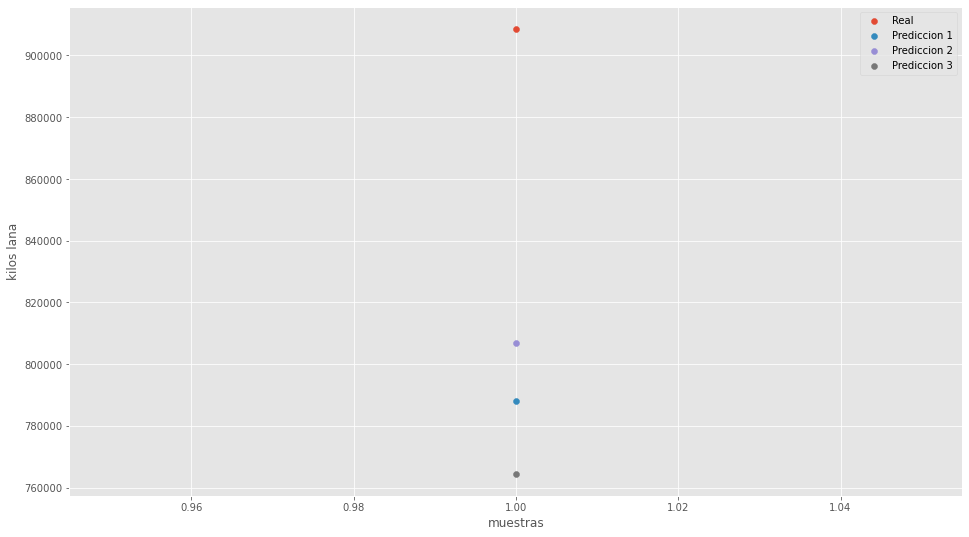

In [52]:
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
plt.scatter(y=dato_real, x=1, label="Real")
plt.scatter(y=resultado_prediccion_1, x=1, label="Prediccion 1")
plt.scatter(y=resultado_prediccion_2, x=1, label="Prediccion 2")
plt.scatter(y=resultado_prediccion_3, x=1, label="Prediccion 3")
plt.xlabel('muestras')
plt.ylabel('kilos lana')
plt.legend()
plt.show()

El mejor modelo resulta ser el 2, seguido por el 1 y por último el 3. Cómo acá no se puede calcular el R2, por estar trabajando con un solo dato, solo se va a tener en cuenta cuál es el modelo que esta mas cerca del dato real.

| Modelo | Puntaje positvo | Puntaje negativo | Total |
| --- | --- | --- | --- |
| 1 | 0 | -0.25 | 2.25 |
| 2 | 1 | -0.20 | 3.60 |
| 3 | 0 | 0 | 7.00 |

## Resultados

El mejor **modelo es el 3** con un puntaje final de 7.0, seguido del modelo 2 con 3.6 y por ultimo el modelo 1 con 2.5 puntos. Acá hay que tener en cuenta que el modelo 1 fue entrenado con el dataset que estamos trabajando y fue el que peor puntaje obtuvo. Sin embargo el modelo 3 logro predecir estos datos que no conocía.